# Importing libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ex. 1

## 1.1 Combine all provided data adequately into a single, tidy data set (e.g. by merging, concatenating or reshaping the data) such that you are able to answer the subsequent questions.

### 1.1.1 Metadata

converting the metadata excel file into a pandas dataframe using `pd.read_excel()`.

In [22]:
metadata = pd.read_excel('Data for Project 1/metadata.xlsx')
metadata.head()

,athlete_id,name,sex,measurements,born,died,affiliations
0,7,Patrick•Chila,Male,180 cm / 73 kg,1969-11-27,NaN,Espérance de Reuilly / Levallois SCTT / Royal ...
1,15,Damien•Éloi,Male,165 cm / 58 kg,1969-07-04,NaN,"Caen TTC, Caen (FRA) / SAG Cestas, Cestas (FRA..."
2,27,Christophe•Legoût,Male,177 cm / 75 kg,1973-08-06,NaN,"Levallois SC, Levallois-Perret (FRA) / Istres ..."
3,132,Elke•Schall-Wosik,Female,180 cm / 68 kg,1973-07-19,NaN,TSG Dülmen / Bayer Uerdingen / SV Winterwerb /...
4,179,Kallinikos•Kreangka,Male,169 cm / 62 kg,1972-03-08,NaN,"Finower TTC, GER / TTF Liebherr Ochsenhausen E..."


### 1.1.2 DataFrames using 'for' loop

using `for` loop to convert the yearly results files into individual dataframes based on year to avoid redundancy as much as possible and also to facilitate easier access to individual dfs later down the line.

In [23]:
dfs = {}

directory = 'Data for Project 1/'

for year in range(2006, 2017,2):
    file_path = os.path.join(directory, f'results_{year}.csv')
    dfs[year] = pd.read_csv(file_path)
    dfs[year].insert(2, 'year', year)

df_2006 = dfs[2006]
df_2008 = dfs[2008]
df_2010 = dfs[2010]
df_2012 = dfs[2012]
df_2014 = dfs[2014]
df_2016 = dfs[2016]

### 1.1.3 Merging dfs

left merging the individual dfs thus created with the `metadata` df one-by-one and storing them in individual variables to facilitate easier access later down the line

In [24]:
merged_dfs = {}

for year in range(2006, 2017,2):
    merged_dfs[year] = pd.merge(metadata, dfs[year], on='athlete_id', how='outer', suffixes=('', '_dup'))

df_2006_merged = merged_dfs[2006]
df_2008_merged = merged_dfs[2008]
df_2010_merged = merged_dfs[2010]
df_2012_merged = merged_dfs[2012]
df_2014_merged = merged_dfs[2014]
df_2016_merged = merged_dfs[2016]

### 1.1.4 Concatenating dfs

concatenating the `merged_dfs` into a `grand_df` and resetting the index for proper data management.

In [25]:
grand_df = pd.concat(merged_dfs, ignore_index=True)
grand_df.reset_index(drop=True, inplace=True)
grand_df.head()

,athlete_id,name,sex,measurements,born,died,affiliations,season,year,sport,event,position,medal,country,team
0,7,Patrick•Chila,Male,180 cm / 73 kg,1969-11-27,NaN,Espérance de Reuilly / Levallois SCTT / Royal ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15,Damien•Éloi,Male,165 cm / 58 kg,1969-07-04,NaN,"Caen TTC, Caen (FRA) / SAG Cestas, Cestas (FRA...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27,Christophe•Legoût,Male,177 cm / 75 kg,1973-08-06,NaN,"Levallois SC, Levallois-Perret (FRA) / Istres ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,132,Elke•Schall-Wosik,Female,180 cm / 68 kg,1973-07-19,NaN,TSG Dülmen / Bayer Uerdingen / SV Winterwerb /...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,179,Kallinikos•Kreangka,Male,169 cm / 62 kg,1972-03-08,NaN,"Finower TTC, GER / TTF Liebherr Ochsenhausen E...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
grand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197853 entries, 0 to 197852
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    197853 non-null  int64  
 1   name          197853 non-null  object 
 2   sex           197853 non-null  object 
 3   measurements  195800 non-null  object 
 4   born          197846 non-null  object 
 5   died          885 non-null     object 
 6   affiliations  156547 non-null  object 
 7   season        54276 non-null   object 
 8   year          54276 non-null   float64
 9   sport         54276 non-null   object 
 10  event         54276 non-null   object 
 11  position      45546 non-null   object 
 12  medal         7642 non-null    object 
 13  country       54276 non-null   object 
 14  team          20820 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 22.6+ MB


In [27]:
grand_df['year'] = grand_df['year'].fillna(0).astype('int64')  #...converting year to dtype int64 and filling missing values with 0

## 1.3 Sort the data permanently by year, sport, event and position. Then display the first 3 rows and the last 3 rows of the data set and print the number of rows and columns.

In [28]:
grand_df.sort_values(by=['year', 'sport', 'event', 'position'], inplace=True)  #... sorting as instructed
grand_df.reset_index(drop=True, inplace=True)   #... resetting index for proper data management
grand_df.head(3)  #... displaying first 3 rows as instructed

,athlete_id,name,sex,measurements,born,died,affiliations,season,year,sport,event,position,medal,country,team
0,7,Patrick•Chila,Male,180 cm / 73 kg,1969-11-27,NaN,Espérance de Reuilly / Levallois SCTT / Royal ...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,15,Damien•Éloi,Male,165 cm / 58 kg,1969-07-04,NaN,"Caen TTC, Caen (FRA) / SAG Cestas, Cestas (FRA...",NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,27,Christophe•Legoût,Male,177 cm / 75 kg,1973-08-06,NaN,"Levallois SC, Levallois-Perret (FRA) / Istres ...",NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
grand_df.tail(3)  #... displaying last 3 rows as instructed

,athlete_id,name,sex,measurements,born,died,affiliations,season,year,sport,event,position,medal,country,team
197850,117165,Tamás•Lőrincz,Male,172 cm / 75 kg,1986-12-20,NaN,Ceglédi VSE,Summer,2016,Wrestling,"Welterweight, Greco-Roman, Men",16.0,NaN,Hungary,NaN
197851,134915,Ruslan•Tsarev,Male,170 cm / 66 kg,1991-07-16,NaN,"Berkut [Bishkek, KGZ]",Summer,2016,Wrestling,"Welterweight, Greco-Roman, Men",17.0,NaN,Kyrgyzstan,NaN
197852,133610,Adham•Saleh,Male,160 cm / 66 kg,1993-06-27,NaN,NaN,Summer,2016,Wrestling,"Welterweight, Greco-Roman, Men",18.0,NaN,Egypt,NaN


In [30]:
num_rows, num_cols = grand_df.shape
print(f'No. of rows: {num_rows}; No. of columns: {num_cols}')

No. of rows: 197853; No. of columns: 15


# Ex. 2

## 2.1 Which woman won the Gold medal in the 100 meters race of the 2012 olympic games?

In [32]:
result_2_1 = grand_df.query("sex == 'Female' and event == '100 metres, Women' and position == '1.0' and year == 2012")
result_2_1

,athlete_id,name,sex,measurements,born,died,affiliations,season,year,sport,event,position,medal,country,team
167588,114740,Shelly-Ann•Fraser-Pryce,Female,160 cm / 57 kg,1986-12-27,NaN,"MVP Track & Field Club, Kingston (JAM)",Summer,2012,Athletics,"100 metres, Women",1.0,Gold,Jamaica,NaN


**Shelley-Ann Fraser-Pryce** won the **Gold** medal in the **100 metres** race of **2012** Olympic games.

## 2.2 Which athlete has won the most gold medals, considering only athletes from the following countries: “Jamaica”, “Trinidad and Tobago”, “Barbados”, “Grenada”, “Saint Kitts and Nevis”?

* filtering the `grand_df` by the countries in question into `grand_df_filt`.

In [33]:
country_list = ['Jamaica', 'Trinidad and Tobago', 'Barbados','Grenada', 'Saint Kitts and Nevis']
grand_df_filt = grand_df[grand_df['country'].isin(country_list)]

* further filtering the `grand_df_filt` into `df_filt_gold` to only account for gold medal winners and then finding the names of the top 5 athletes who have won the most number of gold medals.

In [34]:
df_filt_gold = grand_df_filt.query("medal == 'Gold'")
df_filt_gold.groupby('name').size().sort_values(ascending=False).head()

name
Usain•Bolt                 8
Elaine•Thompson-Herah      2
Kemar•Bailey-Cole          2
Shelly-Ann•Fraser-Pryce    2
Yohan•Blake                2
dtype: int64

A: considering only athletes from the following countries: “Jamaica”, “Trinidad and Tobago”, “Barbados”, “Grenada”, “Saint Kitts and Nevis”, **Usain Bolt** has won the **most gold medals** amounting to **8**

## 2.3 What was the best position, worst position, and average position achieved by athletes from “Nepal”? 
## (Hint: you can ignore missing values in the position column)

In [35]:
df_nepal = grand_df[grand_df['country'] == 'Nepal']  #...filtering based on country
df_nepal.dropna(subset=['position'])  #...ignoring missing values in position column
df_nepal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 145299 to 196235
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   athlete_id    23 non-null     int64 
 1   name          23 non-null     object
 2   sex           23 non-null     object
 3   measurements  23 non-null     object
 4   born          23 non-null     object
 5   died          0 non-null      object
 6   affiliations  10 non-null     object
 7   season        23 non-null     object
 8   year          23 non-null     int64 
 9   sport         23 non-null     object
 10  event         23 non-null     object
 11  position      18 non-null     object
 12  medal         0 non-null      object
 13  country       23 non-null     object
 14  team          0 non-null      object
dtypes: int64(2), object(13)
memory usage: 2.9+ KB


In [36]:
df_nepal['position'] = df_nepal['position'].astype('float64')  #...converting position to dtype float64

/var/folders/j4/zzbyrmh10250nzjc681c0_x40000gn/T/ipykernel_71864/3797448603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nepal['position'] = df_nepal['position'].astype('float64')  #...converting position to dtype float64


In [37]:
df_nepal.sort_values(by='position', ascending=False)

,athlete_id,name,sex,measurements,born,died,affiliations,season,year,sport,event,position,medal,country,team
145299,110699,Dachhiri•Sherpa,Male,170 cm / 70 kg,1969-11-03,NaN,NaN,Winter,2006,Cross Country Skiing,"15 kilometres, Men",94.0,NaN,Nepal,NaN
163527,110699,Dachhiri•Sherpa,Male,170 cm / 70 kg,1969-11-03,NaN,NaN,Winter,2010,Cross Country Skiing,"15 kilometres, Men",92.0,NaN,Nepal,NaN
181030,110699,Dachhiri•Sherpa,Male,170 cm / 70 kg,1969-11-03,NaN,NaN,Winter,2014,Cross Country Skiing,"15 kilometres, Men",86.0,NaN,Nepal,NaN
159655,115877,Prasiddha•Shah,Male,171 cm / 65 kg,1989-06-03,NaN,NaN,Summer,2008,Swimming,"50 metres Freestyle, Men",81.0,NaN,Nepal,NaN
159752,115992,Karishma•Karki,Female,155 cm / 44 kg,1993-07-18,NaN,NaN,Summer,2008,Swimming,"50 metres Freestyle, Women",81.0,NaN,Nepal,NaN
194735,135290,Sirish•Gurung,Male,158 cm / 65 kg,1998-08-11,NaN,Tribhuwan Army Club (Nepal),Summer,2016,Swimming,"100 metres Freestyle, Men",58.0,NaN,Nepal,NaN
175353,123285,Sneh•Rana,Female,157 cm / 54 kg,1993-05-29,NaN,NaN,Summer,2012,Shooting,"Air Rifle, 10 metres, Women",54.0,NaN,Nepal,NaN
176120,123776,Shreya•Dhital,Female,163 cm / 54 kg,1995-04-12,NaN,NaN,Summer,2012,Swimming,"100 metres Freestyle, Women",47.0,NaN,Nepal,NaN
177100,115877,Prasiddha•Shah,Male,171 cm / 65 kg,1989-06-03,NaN,NaN,Summer,2012,Swimming,"50 metres Freestyle, Men",47.0,NaN,Nepal,NaN
157576,111710,Phool Maya•Kyapchhaki,Female,156 cm / 58 kg,1980-11-24,NaN,"Mahendra Police Club, Kathmandu (NEP)",Summer,2008,Shooting,"Air Rifle, 10 metres, Women",46.0,NaN,Nepal,NaN


In [38]:
nepal_stats = df_nepal['position'].agg(['min', 'max', 'mean'])
print(f'The best position achieved by athletes from Nepal is {nepal_stats['min']}.\n' 
      f'The worst position achieved by athletes from Nepal is {nepal_stats['max']}. \n' 
      f'The average position achieved by athletes from Nepal is {nepal_stats['mean'].round()}.')

The best position achieved by athletes from Nepal is 7.0.
The worst position achieved by athletes from Nepal is 94.0. 
The average position achieved by athletes from Nepal is 48.0.


* The best position achieved by athletes from Nepal is 7.0.
* The worst position achieved by athletes from Nepal is 94.0. 
* The average position achieved by athletes from Nepal is 48.0.

# Ex 3 Visualize how the number of participants has changed over the years. Create a single figure with one subplot for the summer games and one subplot for the winter games. 

#  Note: If a single athlete participates at multiple events at a given olympic game, then count this athlete only once. For instance, Usain Bolt partcipated at three events (100 meters, 200 meters, and 4x100 meters relay) in the 2016 olympic games. He should be counted only as one participant, not as three participants.

In [39]:
partis = grand_df.groupby(['year', 'season'])['athlete_id'].nunique().reset_index()  #...accessing the number of unique athletes by season and year.
partis.head()

,year,season,athlete_id
0,2006,Winter,2504
1,2008,Summer,10971
2,2010,Winter,2553
3,2012,Summer,10571
4,2014,Winter,2772


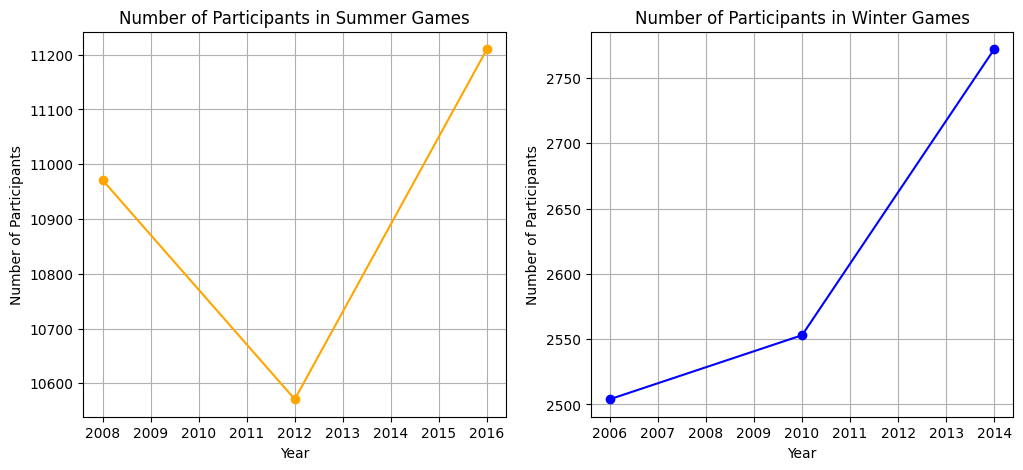

In [40]:
fig, axs = plt.subplots(1,2, figsize=(12, 5))

axs[0].plot(partis[partis['season'] == 'Summer']['year'],
           partis[partis['season'] == 'Summer']['athlete_id'],
           color='orange', marker='o')
axs[0].set_title('Number of Participants in Summer Games')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of Participants')
axs[0].grid()

axs[1].plot(partis[partis['season'] == 'Winter']['year'],
           partis[partis['season'] == 'Winter']['athlete_id'],
           color='blue', marker='o')
axs[1].set_title('Number of Participants in Winter Games')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of Participants')
axs[1].grid()

plt.show()

# Ex. 4 Which lastname is the most common among the athletes of the 2016 olympic games, and how often does this name occur?

* accessing the previously created `df_2016_merged`.
* splitting the data under the `name` column into `first_name` and `last_name`.  

In [41]:
df_2016_merged[['first_name', 'last_name']] = df_2016_merged['name'].str.split('•', n=1, expand=True)

* checking the top 5 most recurring unique last names by pairing them with athlete ids and sorting them in a descending order

In [42]:
print(df_2016_merged.groupby('last_name')['athlete_id'].nunique().sort_values(ascending=False).head())

last_name
Smith       63
Williams    54
López       47
González    46
García      46
Name: athlete_id, dtype: int64


A: The most common last name amongst the 2016 olympic athletes was **'Smith'** and it occured **'63'** times

# Ex.5 Which are the 5 sports with the highest average age of gold medal winners? Provide the sport and the average age.

# Note: We define age as the number of years between the athlete’s birth and the opening date of the olympic games.

* accessing the games sheet from the `metadata.xlsx` file

In [43]:
games = pd.read_excel('Data for Project 1/metadata.xlsx', sheet_name='games')
games.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,year,season,city,country,opened,closed
3,1912,Summer,Stockholm,Sweden,1912-07-06,1912-07-27
4,1920,Summer,Antwerpen,Belgium,1920-08-14,1920-08-30


* setting the third row as the header row

In [44]:
games.columns = games.iloc[2]
games = games[3:].reset_index(drop=True)
games.columns.name = None  #...removing the name from the index column
games

,year,season,city,country,opened,closed
0,1912,Summer,Stockholm,Sweden,1912-07-06,1912-07-27
1,1920,Summer,Antwerpen,Belgium,1920-08-14,1920-08-30
2,1996,Summer,Atlanta,United States,1996-07-19,1996-08-04
3,1924,Summer,Paris,France,1924-07-05,1924-07-27
4,1992,Summer,Barcelona,Spain,1992-07-25,1992-08-09
...,...,...,...,...,...,...
57,2022,Winter,Beijing,People's Republic of China,NaN,NaN
58,2024,Summer,Paris,France,NaN,NaN
59,2026,Winter,Milano-Cortina d'Ampezzo,Italy,NaN,NaN
60,2028,Summer,Los Angeles,United States,NaN,NaN


In [45]:
games_2006_2016 = games[(games['year']>=2006) & (games['year']<=2016)]  #...isolating the games data between 2006 and 2016
games_2006_2016

,year,season,city,country,opened,closed
12,2012,Summer,London,Great Britain,2012-07-27,2012-08-12
13,2016,Summer,Rio de Janeiro,Brazil,2016-08-05,2016-08-21
33,2006,Winter,Torino,Italy,2006-02-10,2006-02-26
34,2010,Winter,Vancouver,Canada,2010-02-12,2010-02-28
50,2014,Winter,Sochi,Russian Federation,2014-02-07,2014-02-23


In [46]:
games_2006_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 12 to 50
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     5 non-null      object
 1   season   5 non-null      object
 2   city     5 non-null      object
 3   country  5 non-null      object
 4   opened   5 non-null      object
 5   closed   5 non-null      object
dtypes: object(6)
memory usage: 280.0+ bytes


In [47]:
games_2006_2016['year'] = games_2006_2016['year'].astype(int)  #...changing type of the year column to int for sorting
games_2006_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 12 to 50
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     5 non-null      int64 
 1   season   5 non-null      object
 2   city     5 non-null      object
 3   country  5 non-null      object
 4   opened   5 non-null      object
 5   closed   5 non-null      object
dtypes: int64(1), object(5)
memory usage: 280.0+ bytes


/var/folders/j4/zzbyrmh10250nzjc681c0_x40000gn/T/ipykernel_71864/2182227227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_2006_2016['year'] = games_2006_2016['year'].astype(int)  #...changing type of the year column to int for sorting


In [48]:
games_2006_2016 = games_2006_2016.sort_values(by='year').reset_index(drop=True)  #...sorting by year
games_2006_2016

,year,season,city,country,opened,closed
0,2006,Winter,Torino,Italy,2006-02-10,2006-02-26
1,2010,Winter,Vancouver,Canada,2010-02-12,2010-02-28
2,2012,Summer,London,Great Britain,2012-07-27,2012-08-12
3,2014,Winter,Sochi,Russian Federation,2014-02-07,2014-02-23
4,2016,Summer,Rio de Janeiro,Brazil,2016-08-05,2016-08-21


In [49]:
games_2006_2016[['opened', 'closed']] = games_2006_2016[['opened', 'closed']].apply(pd.to_datetime)  #...converting the columns 'opened' and 'closed' to dtype datetime
games_2006_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   year     5 non-null      int64         
 1   season   5 non-null      object        
 2   city     5 non-null      object        
 3   country  5 non-null      object        
 4   opened   5 non-null      datetime64[ns]
 5   closed   5 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 372.0+ bytes


In [50]:
games_2006_2016

,year,season,city,country,opened,closed
0,2006,Winter,Torino,Italy,2006-02-10,2006-02-26
1,2010,Winter,Vancouver,Canada,2010-02-12,2010-02-28
2,2012,Summer,London,Great Britain,2012-07-27,2012-08-12
3,2014,Winter,Sochi,Russian Federation,2014-02-07,2014-02-23
4,2016,Summer,Rio de Janeiro,Brazil,2016-08-05,2016-08-21


In [51]:
grand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197853 entries, 0 to 197852
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   athlete_id    197853 non-null  int64 
 1   name          197853 non-null  object
 2   sex           197853 non-null  object
 3   measurements  195800 non-null  object
 4   born          197846 non-null  object
 5   died          885 non-null     object
 6   affiliations  156547 non-null  object
 7   season        54276 non-null   object
 8   year          197853 non-null  int64 
 9   sport         54276 non-null   object
 10  event         54276 non-null   object
 11  position      45546 non-null   object
 12  medal         7642 non-null    object
 13  country       54276 non-null   object
 14  team          20820 non-null   object
dtypes: int64(2), object(13)
memory usage: 22.6+ MB


In [52]:
grand_df['born'] = pd.to_datetime(grand_df['born'])  #...converting the 'born' column to dtype datetime
grand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197853 entries, 0 to 197852
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   athlete_id    197853 non-null  int64         
 1   name          197853 non-null  object        
 2   sex           197853 non-null  object        
 3   measurements  195800 non-null  object        
 4   born          197846 non-null  datetime64[ns]
 5   died          885 non-null     object        
 6   affiliations  156547 non-null  object        
 7   season        54276 non-null   object        
 8   year          197853 non-null  int64         
 9   sport         54276 non-null   object        
 10  event         54276 non-null   object        
 11  position      45546 non-null   object        
 12  medal         7642 non-null    object        
 13  country       54276 non-null   object        
 14  team          20820 non-null   object        
dtypes: datetime64[ns]

In [53]:
grand_df_gold = grand_df.query('medal == "Gold"')  #...filtering for gold medal winners
grand_df_gold.head()

,athlete_id,name,sex,measurements,born,died,affiliations,season,year,sport,event,position,medal,country,team
143577,110095,Ted•Ligety,Male,180 cm / 86 kg,1984-08-31,NaN,"Park City Ski Team, Park City (USA)",Winter,2006,Alpine Skiing,"Combined, Men",1.0,Gold,United States,NaN
143637,99432,Janica•Kostelić,Female,175 cm / 76 kg,1982-01-05,NaN,"SK Zagreb, Zagreb (CRO)",Winter,2006,Alpine Skiing,"Combined, Women",1.0,Gold,Croatia,NaN
143682,101053,Antoine•Dénériaz,Male,189 cm / 97 kg,1976-03-06,NaN,"Morillon, Mont Blanc",Winter,2006,Alpine Skiing,"Downhill, Men",1.0,Gold,France,NaN
143737,99428,Michaela•Dorfmeister,Female,172 cm / 72 kg,1973-03-25,NaN,"WSV Pernitz-Unterberg, Pernitz (AUT)",Winter,2006,Alpine Skiing,"Downhill, Women",1.0,Gold,Austria,NaN
143782,101751,Benjamin•Raich,Male,182 cm / 83 kg,1978-02-28,NaN,"SV Leins, Leins, Arzl im Pitztal (AUT)",Winter,2006,Alpine Skiing,"Giant Slalom, Men",1.0,Gold,Austria,NaN


In [54]:
grand_gold_open = pd.merge(grand_df_gold, games_2006_2016, on='year', how='left')  #...adding 'opened' column to grand_df_gold for ease of use
grand_gold_open

,athlete_id,name,sex,measurements,born,died,affiliations,season_x,year,sport,event,position,medal,country_x,team,season_y,city,country_y,opened,closed
0,110095,Ted•Ligety,Male,180 cm / 86 kg,1984-08-31,NaN,"Park City Ski Team, Park City (USA)",Winter,2006,Alpine Skiing,"Combined, Men",1.0,Gold,United States,NaN,Winter,Torino,Italy,2006-02-10,2006-02-26
1,99432,Janica•Kostelić,Female,175 cm / 76 kg,1982-01-05,NaN,"SK Zagreb, Zagreb (CRO)",Winter,2006,Alpine Skiing,"Combined, Women",1.0,Gold,Croatia,NaN,Winter,Torino,Italy,2006-02-10,2006-02-26
2,101053,Antoine•Dénériaz,Male,189 cm / 97 kg,1976-03-06,NaN,"Morillon, Mont Blanc",Winter,2006,Alpine Skiing,"Downhill, Men",1.0,Gold,France,NaN,Winter,Torino,Italy,2006-02-10,2006-02-26
3,99428,Michaela•Dorfmeister,Female,172 cm / 72 kg,1973-03-25,NaN,"WSV Pernitz-Unterberg, Pernitz (AUT)",Winter,2006,Alpine Skiing,"Downhill, Women",1.0,Gold,Austria,NaN,Winter,Torino,Italy,2006-02-10,2006-02-26
4,101751,Benjamin•Raich,Male,182 cm / 83 kg,1978-02-28,NaN,"SV Leins, Leins, Arzl im Pitztal (AUT)",Winter,2006,Alpine Skiing,"Giant Slalom, Men",1.0,Gold,Austria,NaN,Winter,Torino,Italy,2006-02-10,2006-02-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,120372,Roman•Vlasov,Male,175 cm / 75 kg,1990-10-06,NaN,NaN,Summer,2016,Wrestling,"Middleweight, Greco-Roman, Men",1.0,Gold,Russian Federation,NaN,Summer,Rio de Janeiro,Brazil,2016-08-05,2016-08-21
2512,124609,Taha•Akgül,Male,192 cm / 125 kg,1990-11-22,NaN,"Aski Spor Kulübü, Ankara (TUR)",Summer,2016,Wrestling,"Super-Heavyweight, Freestyle, Men",1.0,Gold,Turkey,NaN,Summer,Rio de Janeiro,Brazil,2016-08-05,2016-08-21
2513,107601,Mijaín•López,Male,198 cm / 130 kg,1982-08-20,NaN,"CEAR Cuba, Habana",Summer,2016,Wrestling,"Super-Heavyweight, Greco-Roman, Men",1.0,Gold,Cuba,NaN,Summer,Rio de Janeiro,Brazil,2016-08-05,2016-08-21
2514,135830,Soslan•Ramonov,Male,170 cm / 65 kg,1991-01-01,NaN,Central Army Sports Club [CSKA] [Russian Feder...,Summer,2016,Wrestling,"Welterweight, Freestyle, Men",1.0,Gold,Russian Federation,NaN,Summer,Rio de Janeiro,Brazil,2016-08-05,2016-08-21


* calculating and storing the age of gold medal winners in years upto 2 decimals

In [55]:
grand_gold_open['age'] = ((grand_gold_open['opened'] - grand_gold_open['born'])/pd.Timedelta(days=365.25)).round(2)
grand_gold_open

,athlete_id,name,sex,measurements,born,died,affiliations,season_x,year,sport,...,position,medal,country_x,team,season_y,city,country_y,opened,closed,age
0,110095,Ted•Ligety,Male,180 cm / 86 kg,1984-08-31,NaN,"Park City Ski Team, Park City (USA)",Winter,2006,Alpine Skiing,...,1.0,Gold,United States,NaN,Winter,Torino,Italy,2006-02-10,2006-02-26,21.45
1,99432,Janica•Kostelić,Female,175 cm / 76 kg,1982-01-05,NaN,"SK Zagreb, Zagreb (CRO)",Winter,2006,Alpine Skiing,...,1.0,Gold,Croatia,NaN,Winter,Torino,Italy,2006-02-10,2006-02-26,24.10
2,101053,Antoine•Dénériaz,Male,189 cm / 97 kg,1976-03-06,NaN,"Morillon, Mont Blanc",Winter,2006,Alpine Skiing,...,1.0,Gold,France,NaN,Winter,Torino,Italy,2006-02-10,2006-02-26,29.93
3,99428,Michaela•Dorfmeister,Female,172 cm / 72 kg,1973-03-25,NaN,"WSV Pernitz-Unterberg, Pernitz (AUT)",Winter,2006,Alpine Skiing,...,1.0,Gold,Austria,NaN,Winter,Torino,Italy,2006-02-10,2006-02-26,32.88
4,101751,Benjamin•Raich,Male,182 cm / 83 kg,1978-02-28,NaN,"SV Leins, Leins, Arzl im Pitztal (AUT)",Winter,2006,Alpine Skiing,...,1.0,Gold,Austria,NaN,Winter,Torino,Italy,2006-02-10,2006-02-26,27.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,120372,Roman•Vlasov,Male,175 cm / 75 kg,1990-10-06,NaN,NaN,Summer,2016,Wrestling,...,1.0,Gold,Russian Federation,NaN,Summer,Rio de Janeiro,Brazil,2016-08-05,2016-08-21,25.83
2512,124609,Taha•Akgül,Male,192 cm / 125 kg,1990-11-22,NaN,"Aski Spor Kulübü, Ankara (TUR)",Summer,2016,Wrestling,...,1.0,Gold,Turkey,NaN,Summer,Rio de Janeiro,Brazil,2016-08-05,2016-08-21,25.70
2513,107601,Mijaín•López,Male,198 cm / 130 kg,1982-08-20,NaN,"CEAR Cuba, Habana",Summer,2016,Wrestling,...,1.0,Gold,Cuba,NaN,Summer,Rio de Janeiro,Brazil,2016-08-05,2016-08-21,33.96
2514,135830,Soslan•Ramonov,Male,170 cm / 65 kg,1991-01-01,NaN,Central Army Sports Club [CSKA] [Russian Feder...,Summer,2016,Wrestling,...,1.0,Gold,Russian Federation,NaN,Summer,Rio de Janeiro,Brazil,2016-08-05,2016-08-21,25.59


* calculating mean age and grouping by sport

In [56]:
mean_age_sport = grand_gold_open.groupby('sport')['age'].mean().round(2).reset_index()
mean_age_sport.head()

,sport,age
0,Alpine Skiing,27.31
1,Archery,26.55
2,Artistic Gymnastics,22.33
3,Artistic Swimming,25.45
4,Athletics,26.75


* sorting for the 5 sports highest average age of gold medal winners

In [57]:
mean_age_sport.sort_values(by='age', ascending=False).head()

,sport,age
23,Equestrian Jumping,42.80
22,Equestrian Eventing,35.70
18,Cycling Road,33.90
21,Equestrian Dressage,33.75
15,Curling,33.41


# Ex. 6 Calculate the medal table for the olympic games 2016. See the official medal table as a reference. Your medal table should have the same structure (same column names and same sorting) as the official medal table. Display the top 10 countries.

# Hint: In team events such as Basketball, all team members of the winning team receive a gold medal, but for the medal table it should only count as one gold medal. The same logic also applies to silver and bronze medals. You can recognize team events either via the column team (which is then non-missing) or by the fact that multiple athletes of a country have won the same medal in a single competition

## 6.1 Team Medals

* accessing medals for teams from `df_2016_merged`

In [58]:
team_medals = df_2016_merged[df_2016_merged['team'].notnull()]
team_medals.head()

,athlete_id,name,sex,measurements,born,died,affiliations,season,year,sport,event,position,medal,country,team,first_name,last_name
9,287,Leander•Paes,Male,178 cm / 77 kg,1973-06-17,NaN,NaN,Summer,2016.0,Tennis,"Doubles, Men",17.0,NaN,India,Rohan Bopanna,Leander,Paes
20,757,Daniel•Nestor,Male,191 cm / 87 kg,1972-09-04,NaN,NaN,Summer,2016.0,Tennis,"Doubles, Men",4.0,NaN,Canada,Vasek Pospisil,Daniel,Nestor
29,1027,Segun•Toriola,Male,182 cm / 70 kg,1974-09-18,NaN,"TTC FVT de Keij, NED",Summer,2016.0,Table Tennis,"Team, Men",9.0,NaN,Nigeria,Nigeria,Segun,Toriola
54,2563,Martina•Hingis,Female,170 cm / 59 kg,1980-09-30,NaN,NaN,Summer,2016.0,Tennis,"Doubles, Women",2.0,Silver,Switzerland,Timea Bacsinszky,Martina,Hingis
81,9212,Martin•Marinov,Male,178 cm / 88 kg,1967-10-25,NaN,Gold Coast Canoe Cougars/Kayak Club,Summer,2016.0,Canoe Sprint,"Canadian Doubles, 1,000 metres, Men",10.0,NaN,Australia,Ferenc Szekszárdi,Martin,Marinov


* dropping duplicates

In [59]:
team_medals_uniq = team_medals.drop_duplicates(subset=['country', 'medal', 'event'])
team_medals_uniq.head()

,athlete_id,name,sex,measurements,born,died,affiliations,season,year,sport,event,position,medal,country,team,first_name,last_name
9,287,Leander•Paes,Male,178 cm / 77 kg,1973-06-17,NaN,NaN,Summer,2016.0,Tennis,"Doubles, Men",17.0,NaN,India,Rohan Bopanna,Leander,Paes
20,757,Daniel•Nestor,Male,191 cm / 87 kg,1972-09-04,NaN,NaN,Summer,2016.0,Tennis,"Doubles, Men",4.0,NaN,Canada,Vasek Pospisil,Daniel,Nestor
29,1027,Segun•Toriola,Male,182 cm / 70 kg,1974-09-18,NaN,"TTC FVT de Keij, NED",Summer,2016.0,Table Tennis,"Team, Men",9.0,NaN,Nigeria,Nigeria,Segun,Toriola
54,2563,Martina•Hingis,Female,170 cm / 59 kg,1980-09-30,NaN,NaN,Summer,2016.0,Tennis,"Doubles, Women",2.0,Silver,Switzerland,Timea Bacsinszky,Martina,Hingis
81,9212,Martin•Marinov,Male,178 cm / 88 kg,1967-10-25,NaN,Gold Coast Canoe Cougars/Kayak Club,Summer,2016.0,Canoe Sprint,"Canadian Doubles, 1,000 metres, Men",10.0,NaN,Australia,Ferenc Szekszárdi,Martin,Marinov


## 6.2 Individual Medals

* accessing individual medals from `df_2016_merged`

In [60]:
ind_medals = df_2016_merged[df_2016_merged['team'].isnull()]
ind_medals.head()

,athlete_id,name,sex,measurements,born,died,affiliations,season,year,sport,event,position,medal,country,team,first_name,last_name
0,7,Patrick•Chila,Male,180 cm / 73 kg,1969-11-27,NaN,Espérance de Reuilly / Levallois SCTT / Royal ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Patrick,Chila
1,15,Damien•Éloi,Male,165 cm / 58 kg,1969-07-04,NaN,"Caen TTC, Caen (FRA) / SAG Cestas, Cestas (FRA...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Damien,Éloi
2,27,Christophe•Legoût,Male,177 cm / 75 kg,1973-08-06,NaN,"Levallois SC, Levallois-Perret (FRA) / Istres ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christophe,Legoût
3,132,Elke•Schall-Wosik,Female,180 cm / 68 kg,1973-07-19,NaN,TSG Dülmen / Bayer Uerdingen / SV Winterwerb /...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Elke,Schall-Wosik
4,179,Kallinikos•Kreangka,Male,169 cm / 62 kg,1972-03-08,NaN,"Finower TTC, GER / TTF Liebherr Ochsenhausen E...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kallinikos,Kreangka


## 6.3 Combining the team and individual medals

In [61]:
medals_comb = pd.concat([ind_medals, team_medals_uniq])
medals_comb_count = medals_comb.groupby(['country', 'medal']).size().unstack(fill_value=0).reset_index()
medals_comb_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  86 non-null     object
 1   Bronze   86 non-null     int64 
 2   Gold     86 non-null     int64 
 3   Silver   86 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.8+ KB


In [62]:
medals_comb_count.columns.name = None  #...removing name from index column
medals_comb_count.rename(columns={'country':'Team'}, inplace=True)  #...renaming the country column to Team
medals_comb_count.head()

,Team,Bronze,Gold,Silver
0,Algeria,0,0,2
1,Argentina,0,3,1
2,Armenia,0,1,3
3,Australia,10,8,11
4,Austria,1,0,0


In [63]:
medals_comb_count['Total'] = medals_comb_count[['Gold', 'Silver', 'Bronze']].sum(axis=1)  #...adding a Total column
medals_comb_count = medals_comb_count[['Team', 'Gold', 'Silver', 'Bronze', 'Total']]  #...reordering the columns to resemble the official table
medals_comb_count.replace(0, '-', inplace=True)  #...replacing 0 with '-' to resemble the official table
medals_comb_count

,Team,Gold,Silver,Bronze,Total
0,Algeria,-,2,-,2
1,Argentina,3,1,-,4
2,Armenia,1,3,-,4
3,Australia,8,11,10,29
4,Austria,-,-,1,1
...,...,...,...,...,...
81,United Arab Emirates,-,-,1,1
82,United States,46,37,38,121
83,Uzbekistan,4,2,7,13
84,Venezuela,-,2,1,3


* displaying the top 10 countries by alphabet

In [64]:
medals_comb_count.head(10)

,Team,Gold,Silver,Bronze,Total
0,Algeria,-,2,-,2
1,Argentina,3,1,-,4
2,Armenia,1,3,-,4
3,Australia,8,11,10,29
4,Austria,-,-,1,1
5,Azerbaijan,1,7,10,18
6,Bahrain,1,1,-,2
7,Belarus,1,4,4,9
8,Belgium,2,2,2,6
9,Brazil,7,6,6,19


* displaying the top 10 countries by the total number of medals won

In [65]:
medals_comb_count.sort_values(by='Total', ascending=False).head(10)

,Team,Gold,Silver,Bronze,Total
82,United States,46,37,38,121
57,People's Republic of China,26,18,26,70
30,Great Britain,26,23,17,66
65,Russian Federation,19,17,20,56
29,Germany,17,10,15,42
27,France,9,18,14,41
42,Japan,12,8,20,40
3,Australia,8,11,10,29
40,Italy,8,12,8,28
12,Canada,4,3,15,22
